<a href="https://colab.research.google.com/github/apchavezr/16.-Aprendizaje-Profundo-para-Ciencia-de-Datos/blob/main/Analisis_Discursos_Politicos_Colombia_LSTM_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis de Discursos Políticos en Colombia: Clasificación por Ideología e Intensidad Emocional

Este cuaderno muestra cómo construir un modelo básico de PLN para analizar discursos políticos colombianos utilizando una arquitectura *Embedding + LSTM*. El objetivo es clasificar cada discurso (o fragmento) según su orientación ideológica (izquierda o derecha) y su carga emocional (alta, media, baja).

**Flujo de trabajo**:
1. Carga de datos simulados de discursos políticos
2. Preprocesamiento y normalización del texto
3. Tokenización y vectorización de secuencias
4. Construcción de un modelo con capa Embedding + LSTM
5. Clasificación binaria (ideología) y multiclase (emoción)
6. Evaluación del rendimiento
7. Visualización de métricas y predicciones

> ⚠️ Nota: Los datos utilizados son simuladis.  


In [23]:
import pandas as pd

# Datos simulados ampliados (20 frases)
data = {
    "texto": [
        "Lucharemos por la equidad social y los derechos de todos",
        "Hay que reducir impuestos para el crecimiento empresarial",
        "El pueblo exige justicia y respeto a la diversidad",
        "La economía se fortalece con menos regulación",
        "Los jóvenes merecen educación gratuita y salud universal",
        "La seguridad se garantiza con orden y autoridad",
        "Trabajaremos por un país incluyente, solidario y pacífico",
        "Debemos proteger la libre empresa y el emprendimiento nacional",
        "Rechazamos la exclusión y promovemos la igualdad de oportunidades",
        "Se requieren incentivos fiscales para atraer inversión extranjera",
        "Defendemos los derechos laborales y el salario digno",
        "Las instituciones deben promover estabilidad macroeconómica",
        "La justicia social será el eje de nuestras políticas públicas",
        "La reducción del gasto público fortalece la economía",
        "El cambio climático requiere una política ambiental progresista",
        "La soberanía se fortalece con más defensa y seguridad nacional",
        "Proponemos un sistema tributario progresivo y equitativo",
        "El crecimiento económico se logra con menos intervención estatal",
        "Abogamos por la paz, la reconciliación y el diálogo nacional",
        "La eficiencia del mercado debe prevalecer sobre la regulación excesiva"
    ],
    "ideologia": [
        0, 1, 0, 1, 0, 1,
        0, 1, 0, 1, 0, 1,
        0, 1, 0, 1, 0, 1,
        0, 1
    ],
    "emocion": [
        2, 1, 2, 1, 2, 2,
        2, 1, 2, 1, 2, 1,
        2, 1, 2, 1, 2, 1,
        2, 1
    ]
}

df = pd.DataFrame(data)
df


,texto,ideologia,emocion
0,Lucharemos por la equidad social y los derecho...,0,2
1,Hay que reducir impuestos para el crecimiento ...,1,1
2,El pueblo exige justicia y respeto a la divers...,0,2
3,La economía se fortalece con menos regulación,1,1
4,Los jóvenes merecen educación gratuita y salud...,0,2
5,La seguridad se garantiza con orden y autoridad,1,2
6,"Trabajaremos por un país incluyente, solidario...",0,2
7,Debemos proteger la libre empresa y el emprend...,1,1
8,Rechazamos la exclusión y promovemos la iguald...,0,2
9,Se requieren incentivos fiscales para atraer i...,1,1


In [24]:
# Preprocesamiento del texto
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

tokenizer = Tokenizer(num_words=1000, oov_token="<OOV>")
tokenizer.fit_on_texts(df["texto"])
sequences = tokenizer.texts_to_sequences(df["texto"])
padded = pad_sequences(sequences, padding='post')

# Variables de salida
y_ideologia = df["ideologia"]
y_emocion = to_categorical(df["emocion"], num_classes=3)

padded.shape, y_ideologia.shape, y_emocion.shape

((20, 10), (20,), (20, 3))

In [25]:
model = Sequential([
    Embedding(input_dim=1000, output_dim=16, input_shape=(padded.shape[1],)),
    LSTM(32),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_11 (Embedding)        │ (None, 10, 16)         │        16,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_11 (LSTM)                  │ (None, 32)             │         6,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,817 (89.13 KB)

 Trainable params: 22,817 (89.13 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
# Entrenamiento para ideología
history = model.fit(padded, y_ideologia, epochs=10, verbose=1)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.4500 - loss: 0.6931
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.6500 - loss: 0.6922
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.7000 - loss: 0.6912
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.7500 - loss: 0.6901
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.7500 - loss: 0.6891
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.8000 - loss: 0.6879
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.8500 - loss: 0.6865
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.9000 - loss: 0.6849
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.9500 - loss: 0.6831
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.9500 - loss: 0.6811


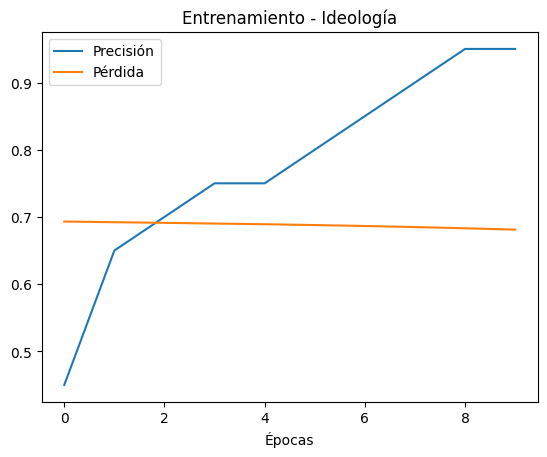

In [27]:
# Visualización
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Precisión')
plt.plot(history.history['loss'], label='Pérdida')
plt.title('Entrenamiento - Ideología')
plt.xlabel('Épocas')
plt.legend()
plt.show()

# Conclusión sobre el gráfico

* Incremento constante de precisión:

   La línea azul evidencia un aumento sostenido de la precisión desde aproximadamente 0.45 hasta 0.95, lo que indica que el modelo está aprendiendo a distinguir entre discursos de izquierda y derecha de manera cada vez más efectiva con cada época.

* Disminución leve de la pérdida:

   La línea naranja de la pérdida muestra una reducción muy sutil, lo que sugiere que la función de error se está optimizando, aunque a un ritmo lento. Esto puede deberse a:

    * Un conjunto de datos pequeño o limitado en complejidad.

    * Una configuración del modelo que está priorizando rápidamente la precisión sin grandes cambios en la función de costo.

* Ausencia de overfitting visible:

  Aunque solo se muestra el entrenamiento (y no la validación), el comportamiento progresivo de mejora no presenta señales claras de sobreajuste (overfitting) en estas 10 épocas. Sería ideal incluir una curva de validación para confirmar esta conclusión.

* Eficiencia del modelo con pocos datos:

  Dado que el conjunto de entrenamiento es sintético y reducido (20 frases), estos resultados son un buen indicio de que la arquitectura propuesta (Embedding + LSTM) es capaz de aprender representaciones semánticas útiles incluso con insumos limitados.

## Sugerencia

Para clasificar también la emoción, puede construirse un modelo paralelo con `Dense(3, activation='softmax')` y entrenarse usando `categorical_crossentropy`.

Esta implementación demuestra cómo puede integrarse el análisis político y emocional en un flujo PLN básico utilizando Keras y TensorFlow.
